In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime as datetime

C:\Users\ANKIT\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
import pandas_datareader.data as web

In [3]:
start = datetime.datetime(2019,3,1)
end = datetime.datetime(2020,3,26)

In [4]:
tesla = web.DataReader('TSLA', 'yahoo', start, end)

In [5]:
ford = web.DataReader('ford', 'yahoo', start, end)
GM = web.DataReader('GM', 'yahoo', start, end)
apple = web.DataReader('AAPL', 'yahoo', start, end)

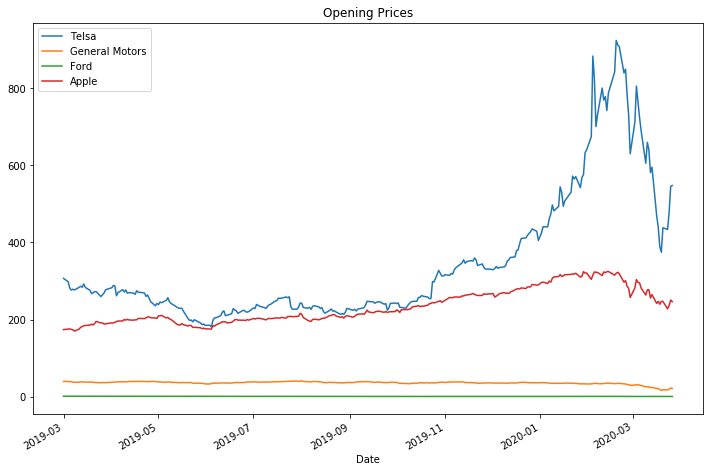

In [6]:
tesla['Open'].plot(label='Telsa',figsize=(12,8),title='Opening Prices')
GM['Open'].plot(label='General Motors')
ford['Open'].plot(label='Ford')
apple['Open'].plot(label='Apple')   
plt.legend()      

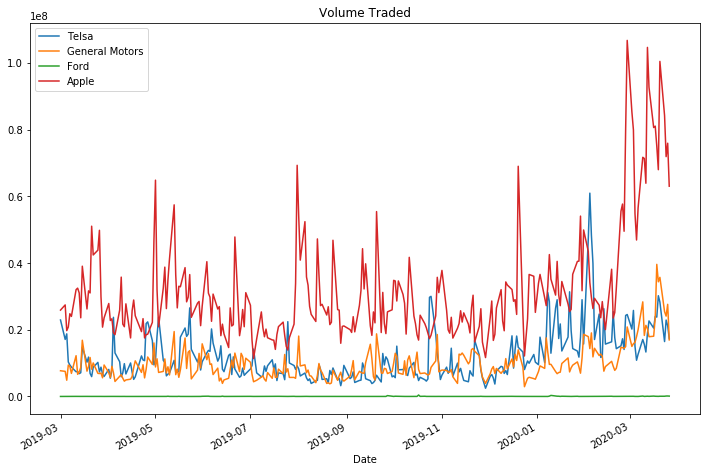

In [7]:
tesla['Volume'].plot(label='Telsa',figsize=(12,8),title='Volume Traded')
GM['Volume'].plot(label='General Motors')
ford['Volume'].plot(label='Ford')
apple['Volume'].plot(label='Apple')   
plt.legend()      

In [8]:
apple['Volume'].idxmax()

Timestamp('2020-02-28 00:00:00')

In [9]:
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
GM['Total Traded'] = GM['Open'] * GM['Volume']
apple['Total Traded'] = apple['Open'] * apple['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']

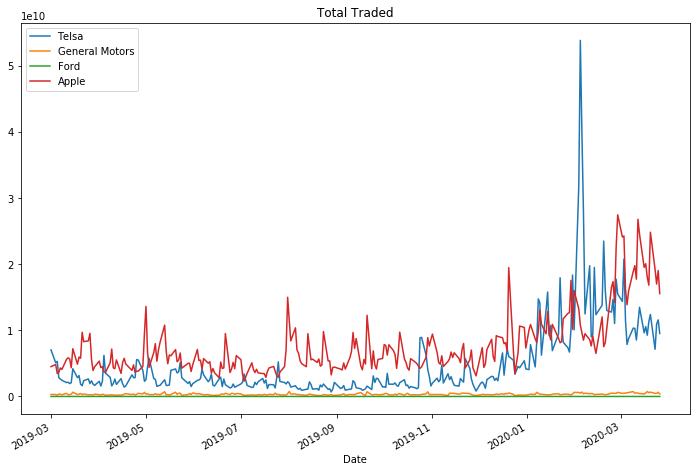

In [10]:
tesla['Total Traded'].plot(label='Telsa',figsize=(12,8),title='Total Traded')
GM['Total Traded'].plot(label='General Motors')
ford['Total Traded'].plot(label='Ford')
apple['Total Traded'].plot(label='Apple')   
plt.legend()      

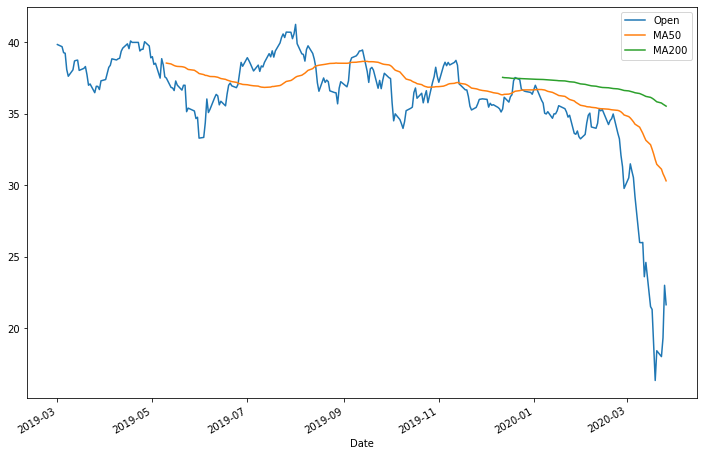

In [11]:
GM['MA50'] = GM['Open'].rolling(50).mean()
GM['MA200'] = GM['Open'].rolling(200).mean()
GM[['Open','MA50','MA200']].plot(figsize=(12,8))

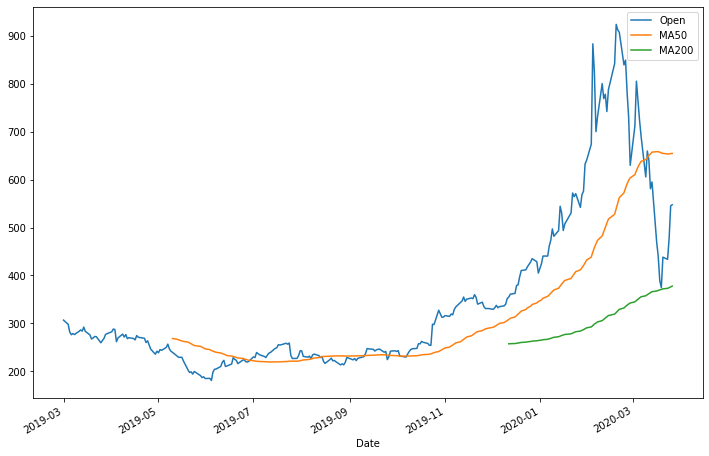

In [12]:
tesla['MA50'] = tesla['Open'].rolling(50).mean()
tesla['MA200'] = tesla['Open'].rolling(200).mean()
tesla[['Open','MA50','MA200']].plot(figsize=(12,8))

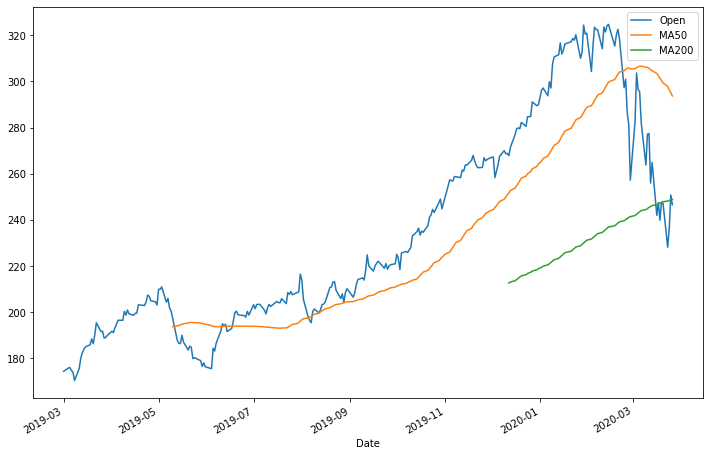

In [13]:
apple['MA50'] = apple['Open'].rolling(50).mean()
apple['MA200'] = apple['Open'].rolling(200).mean()
apple[['Open','MA50','MA200']].plot(figsize=(12,8))

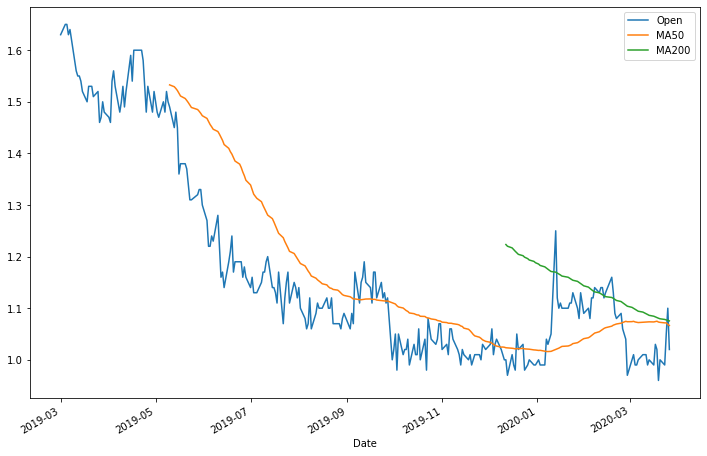

In [14]:
ford['MA50'] = ford['Open'].rolling(50).mean()
ford['MA200'] = ford['Open'].rolling(200).mean()
ford[['Open','MA50','MA200']].plot(figsize=(12,8))

In [15]:
from pandas.plotting import scatter_matrix

In [16]:
cd = pd.concat([tesla['Open'],GM['Open'],ford['Open'],apple['Open']],axis=1)

In [17]:
cd.columns = ['Tesla Open','GM Open','Ford Open','Apple Open']

In [18]:
cd.head()

,Tesla Open,GM Open,Ford Open,Apple Open
Date,,,,
2019-03-01,306.940002,39.849998,1.63,174.279999
2019-03-04,298.119995,39.700001,1.65,175.690002
2019-03-05,282.000000,39.279999,1.65,175.940002
2019-03-06,276.480011,39.240002,1.63,174.669998
2019-03-07,278.839996,38.099998,1.64,173.869995


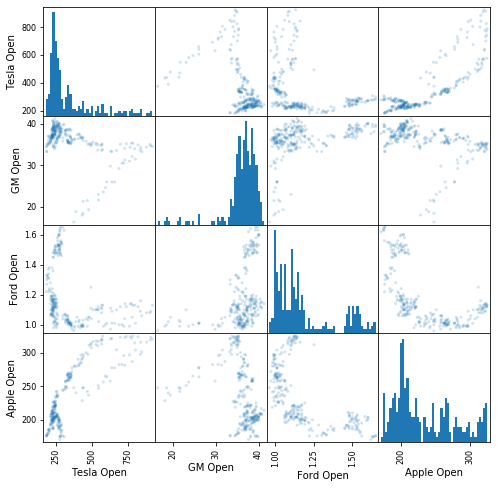

In [19]:
scatter_matrix(cd,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [20]:
from mpl_finance import candlestick_ohlc

C:\Users\ANKIT\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [21]:
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator

In [22]:
ford_reset = ford.loc['2020-03'].reset_index()

In [23]:
ford_reset

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200
0,2020-03-02,1.02,0.99,1.00,1.01,47100,1.01,47100.000000,1.0740,1.10165
1,2020-03-03,1.04,1.00,1.01,1.00,50600,1.00,51105.999517,1.0746,1.09990
2,2020-03-04,1.05,0.99,0.99,1.03,14500,1.03,14355.000138,1.0734,1.09795
3,2020-03-05,1.01,0.99,0.99,0.99,23200,0.99,22968.000221,1.0728,1.09600
4,2020-03-06,1.02,0.99,1.00,1.00,9100,1.00,9100.000000,1.0722,1.09415
5,2020-03-09,1.02,0.98,1.01,0.99,119800,0.99,120997.998857,1.0728,1.09250
6,2020-03-10,1.02,0.99,1.01,1.01,17100,1.01,17270.999837,1.0732,1.09100
7,2020-03-11,1.02,0.99,1.01,0.99,49600,0.99,50095.999527,1.0734,1.08950
8,2020-03-12,1.01,0.96,0.99,1.00,71400,1.00,70686.000681,1.0734,1.08785
9,2020-03-13,1.02,0.99,1.00,0.99,38300,0.99,38300.000000,1.0736,1.08620


In [24]:
ford_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          19 non-null     datetime64[ns]
 1   High          19 non-null     float64       
 2   Low           19 non-null     float64       
 3   Open          19 non-null     float64       
 4   Close         19 non-null     float64       
 5   Volume        19 non-null     int64         
 6   Adj Close     19 non-null     float64       
 7   Total Traded  19 non-null     float64       
 8   MA50          19 non-null     float64       
 9   MA200         19 non-null     float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.6 KB


In [25]:
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date:date2num(date))

In [26]:
list_of_cols = ['date_ax','Open','High','Low','Close']

In [27]:
ford_values = [tuple(vals) for vals in ford_reset[list_of_cols].values]

In [28]:
ford_values

[(737486.0, 1.0, 1.0199999809265137, 0.9900000095367432, 1.0099999904632568),
 (737487.0, 1.0099999904632568, 1.0399999618530273, 1.0, 1.0),
 (737488.0,
  0.9900000095367432,
  1.0499999523162842,
  0.9900000095367432,
  1.0299999713897705),
 (737489.0,
  0.9900000095367432,
  1.0099999904632568,
  0.9900000095367432,
  0.9900000095367432),
 (737490.0, 1.0, 1.0199999809265137, 0.9900000095367432, 1.0),
 (737493.0,
  1.0099999904632568,
  1.0199999809265137,
  0.9800000190734863,
  0.9900000095367432),
 (737494.0,
  1.0099999904632568,
  1.0199999809265137,
  0.9900000095367432,
  1.0099999904632568),
 (737495.0,
  1.0099999904632568,
  1.0199999809265137,
  0.9900000095367432,
  0.9900000095367432),
 (737496.0, 0.9900000095367432, 1.0099999904632568, 0.9599999785423279, 1.0),
 (737497.0, 1.0, 1.0199999809265137, 0.9900000095367432, 0.9900000095367432),
 (737500.0,
  0.9900000095367432,
  1.0399999618530273,
  0.9700000286102295,
  1.0299999713897705),
 (737501.0,
  1.0299999713897705,


In [51]:
monday = WeekdayLocator(byweekday=1)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

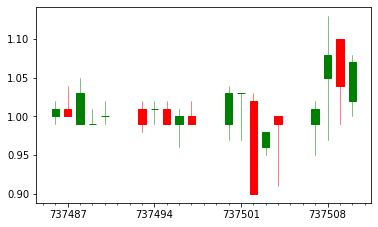

In [56]:
fig,ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(monday)
ax.xaxis.set_minor_locator(alldays)
#ax.xaxis.set_major_locator(dayFormatter)

candlestick_ohlc(ax, ford_values, width=0.6, colorup = 'g', colordown = 'r');

In [37]:
#tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1))-1

In [38]:
tesla['returns'] = tesla['Close'].pct_change(1)

In [39]:
apple['returns'] = apple['Close'].pct_change(1)
GM['returns'] = GM['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)

In [40]:
tesla

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2019-03-01,307.130005,291.899994,306.940002,294.790009,22911400,294.790009,7.032425e+09,NaN,NaN,NaN
2019-03-04,299.000000,282.779999,298.119995,285.359985,17096800,285.359985,5.096898e+09,NaN,NaN,-0.031989
2019-03-05,284.000000,270.100006,282.000000,276.540009,18764700,276.540009,5.291645e+09,NaN,NaN,-0.030908
2019-03-06,281.510010,274.390015,276.480011,276.239990,10335500,276.239990,2.857559e+09,NaN,NaN,-0.001085
2019-03-07,284.700012,274.250000,278.839996,276.589996,9442500,276.589996,2.632947e+09,NaN,NaN,0.001267
...,...,...,...,...,...,...,...,...,...,...
2020-03-20,477.000000,425.790009,438.200012,427.529999,28285500,427.529999,1.239471e+10,654.600402,372.028401,-0.000257
2020-03-23,442.000000,410.500000,433.600006,434.290009,16454500,434.290009,7.134671e+09,653.330402,373.174201,0.015812
2020-03-24,513.690002,474.000000,477.299988,505.000000,22895200,505.000000,1.092788e+10,653.240601,374.535701,0.162817


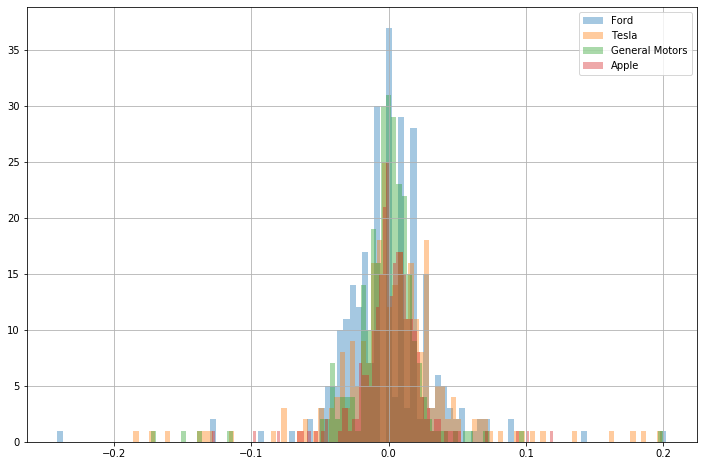

In [41]:
ford['returns'].hist(bins=100,label='Ford',figsize=(12,8),alpha=0.4)
tesla['returns'].hist(bins=100,label='Tesla',figsize=(12,8),alpha=0.4)
GM['returns'].hist(bins=100,label='General Motors',figsize=(12,8),alpha=0.4)
apple['returns'].hist(bins=100,label='Apple',figsize=(12,8),alpha=0.4)
plt.legend()

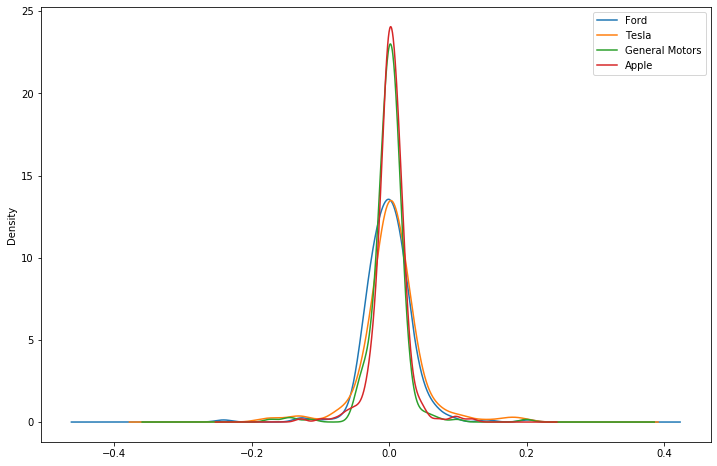

In [42]:
ford['returns'].plot(kind='kde',label='Ford',figsize=(12,8))
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,8))
GM['returns'].plot(kind='kde',label='General Motors',figsize=(12,8))
apple['returns'].plot(kind='kde',label='Apple',figsize=(12,8))
plt.legend()

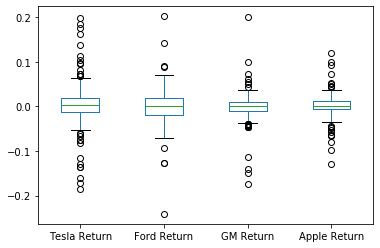

In [43]:
box_df = pd.concat([tesla['returns'],ford['returns'],GM['returns'],apple['returns']],axis=1)
box_df.columns = ['Tesla Return', 'Ford Return', 'GM Return', 'Apple Return']
box_df.plot(kind='box')

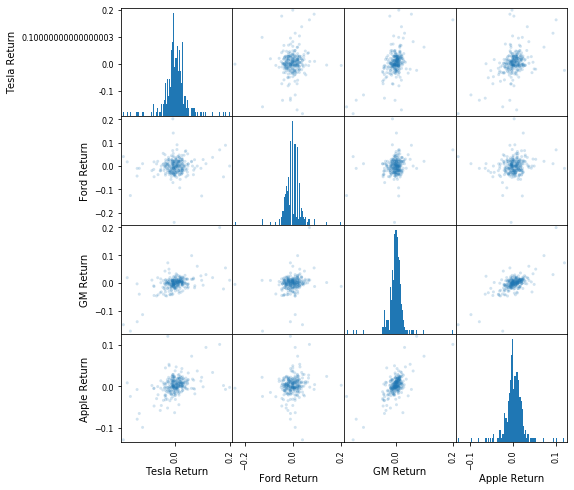

In [44]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':100});

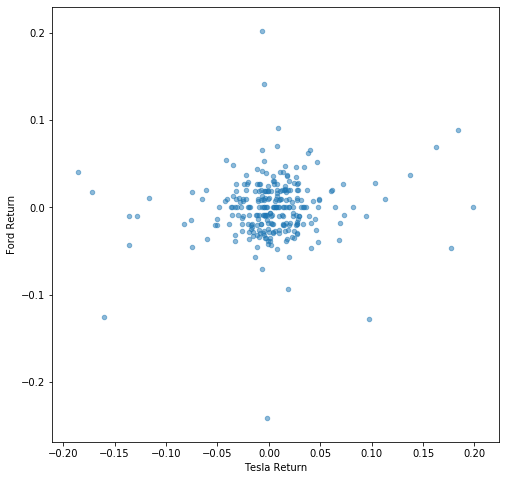

In [45]:
box_df.plot(kind='scatter', x='Tesla Return', y='Ford Return', alpha=0.5, figsize=(8,8))

In [46]:
tesla['Cummulative Return'] = (1+tesla['returns']).cumprod()
apple['Cummulative Return'] = (1+tesla['returns']).cumprod()
GM['Cummulative Return'] = (1+tesla['returns']).cumprod()
ford['Cummulative Return'] = (1+tesla['returns']).cumprod()

In [47]:
tesla

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cummulative Return
Date,,,,,,,,,,,
2019-03-01,307.130005,291.899994,306.940002,294.790009,22911400,294.790009,7.032425e+09,NaN,NaN,NaN,NaN
2019-03-04,299.000000,282.779999,298.119995,285.359985,17096800,285.359985,5.096898e+09,NaN,NaN,-0.031989,0.968011
2019-03-05,284.000000,270.100006,282.000000,276.540009,18764700,276.540009,5.291645e+09,NaN,NaN,-0.030908,0.938092
2019-03-06,281.510010,274.390015,276.480011,276.239990,10335500,276.239990,2.857559e+09,NaN,NaN,-0.001085,0.937074
2019-03-07,284.700012,274.250000,278.839996,276.589996,9442500,276.589996,2.632947e+09,NaN,NaN,0.001267,0.938261
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20,477.000000,425.790009,438.200012,427.529999,28285500,427.529999,1.239471e+10,654.600402,372.028401,-0.000257,1.450287
2020-03-23,442.000000,410.500000,433.600006,434.290009,16454500,434.290009,7.134671e+09,653.330402,373.174201,0.015812,1.473218
2020-03-24,513.690002,474.000000,477.299988,505.000000,22895200,505.000000,1.092788e+10,653.240601,374.535701,0.162817,1.713084


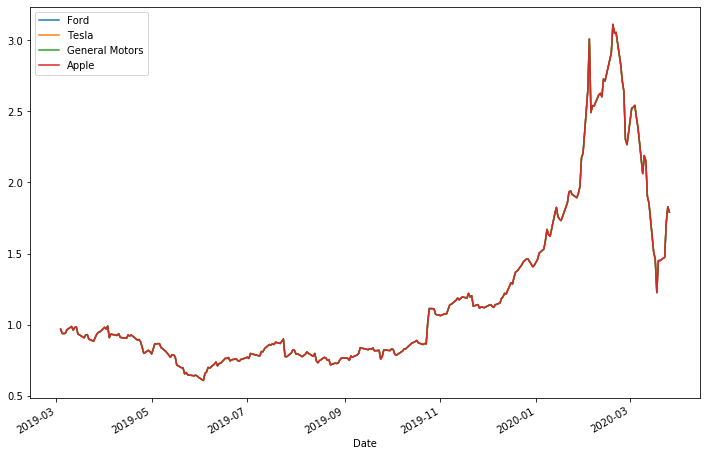

In [48]:
ford['Cummulative Return'].plot(label='Ford',figsize=(12,8))
tesla['Cummulative Return'].plot(label='Tesla',figsize=(12,8))
GM['Cummulative Return'].plot(label='General Motors',figsize=(12,8))
apple['Cummulative Return'].plot(label='Apple',figsize=(12,8))
plt.legend()

In [49]:
apple

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cummulative Return
Date,,,,,,,,,,,
2019-03-01,175.149994,172.889999,174.279999,174.970001,25886200.0,172.709381,4.511447e+09,NaN,NaN,NaN,NaN
2019-03-04,177.750000,173.970001,175.690002,175.850006,27436200.0,173.578033,4.820266e+09,NaN,NaN,0.005029,0.968011
2019-03-05,176.000000,174.539993,175.940002,175.529999,19737400.0,173.262161,3.472598e+09,NaN,NaN,-0.001820,0.938092
2019-03-06,175.490005,173.940002,174.669998,174.520004,20810400.0,172.265228,3.634953e+09,NaN,NaN,-0.005754,0.937074
2019-03-07,174.440002,172.020004,173.869995,172.500000,24796400.0,170.271317,4.311350e+09,NaN,NaN,-0.011575,0.938261
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20,251.830002,228.000000,247.179993,229.240005,100423300.0,229.240005,2.482263e+10,299.383801,247.866399,-0.063486,1.450287
2020-03-23,228.500000,212.610001,228.080002,224.369995,84188200.0,224.369995,1.920164e+10,297.800602,248.091399,-0.021244,1.473218
2020-03-24,247.690002,234.300003,236.360001,246.880005,71882800.0,246.880005,1.699022e+10,296.315801,248.340649,0.100325,1.713084


In [50]:
tesla

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cummulative Return
Date,,,,,,,,,,,
2019-03-01,307.130005,291.899994,306.940002,294.790009,22911400,294.790009,7.032425e+09,NaN,NaN,NaN,NaN
2019-03-04,299.000000,282.779999,298.119995,285.359985,17096800,285.359985,5.096898e+09,NaN,NaN,-0.031989,0.968011
2019-03-05,284.000000,270.100006,282.000000,276.540009,18764700,276.540009,5.291645e+09,NaN,NaN,-0.030908,0.938092
2019-03-06,281.510010,274.390015,276.480011,276.239990,10335500,276.239990,2.857559e+09,NaN,NaN,-0.001085,0.937074
2019-03-07,284.700012,274.250000,278.839996,276.589996,9442500,276.589996,2.632947e+09,NaN,NaN,0.001267,0.938261
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20,477.000000,425.790009,438.200012,427.529999,28285500,427.529999,1.239471e+10,654.600402,372.028401,-0.000257,1.450287
2020-03-23,442.000000,410.500000,433.600006,434.290009,16454500,434.290009,7.134671e+09,653.330402,373.174201,0.015812,1.473218
2020-03-24,513.690002,474.000000,477.299988,505.000000,22895200,505.000000,1.092788e+10,653.240601,374.535701,0.162817,1.713084


In [51]:
ford

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cummulative Return
Date,,,,,,,,,,,
2019-03-01,1.64,1.62,1.63,1.62,3600,1.62,5867.999983,NaN,NaN,NaN,NaN
2019-03-04,1.65,1.61,1.65,1.65,16700,1.65,27554.999602,NaN,NaN,0.018519,0.968011
2019-03-05,1.68,1.62,1.65,1.65,31900,1.65,52634.999239,NaN,NaN,0.000000,0.938092
2019-03-06,1.69,1.63,1.63,1.68,43700,1.68,71230.999792,NaN,NaN,0.018182,0.937074
2019-03-07,1.68,1.62,1.64,1.62,16600,1.62,27223.999763,NaN,NaN,-0.035714,0.938261
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20,1.00,0.91,1.00,0.99,67100,0.99,67100.000000,1.0726,1.07950,0.010204,1.450287
2020-03-23,1.02,0.95,0.99,1.01,67400,1.01,66726.000643,1.0716,1.07825,0.020202,1.473218
2020-03-24,1.13,0.97,1.05,1.08,129500,1.08,135974.993825,1.0716,1.07735,0.069307,1.713084


In [52]:
GM

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cummulative Return
Date,,,,,,,,,,,
2019-03-01,39.970001,39.049999,39.849998,39.529999,7706200.0,37.477543,3.070921e+08,NaN,NaN,NaN,NaN
2019-03-04,41.500000,39.029999,39.700001,39.250000,7524500.0,37.212078,2.987227e+08,NaN,NaN,-0.007083,0.968011
2019-03-05,39.419998,39.020000,39.279999,39.279999,4866200.0,37.240524,1.911443e+08,NaN,NaN,0.000764,0.938092
2019-03-06,39.290001,38.490002,39.240002,38.669998,9413300.0,36.662193,3.693779e+08,NaN,NaN,-0.015530,0.937074
2019-03-07,38.340000,37.639999,38.099998,38.040001,8999800.0,36.422825,3.428924e+08,NaN,NaN,-0.016292,0.938261
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20,18.959999,17.680000,18.420000,18.139999,35702000.0,18.139999,6.576308e+08,31.4678,35.84260,0.024280,1.450287
2020-03-23,18.559999,17.230000,18.010000,17.600000,25419700.0,17.600000,4.578088e+08,31.1282,35.75720,-0.029768,1.473218
2020-03-24,21.670000,18.600000,19.320000,21.110001,24082900.0,21.110001,4.652816e+08,30.8116,35.67725,0.199432,1.713084


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
import statsmodels.api as sm

In [55]:
df = sm.datasets.macrodata.load_pandas().data

In [56]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [57]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [58]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))

In [59]:
df.index = index

In [60]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


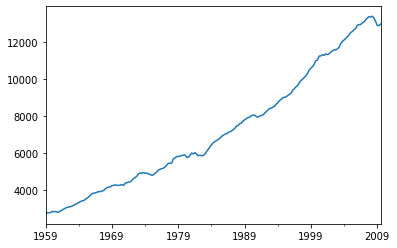

In [61]:
df['realgdp'].plot()

In [62]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])

In [63]:
df['trend'] = gdp_trend

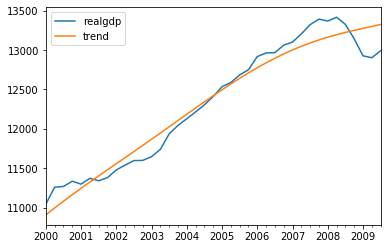

In [64]:
df[['realgdp','trend']]["2000-03-31":].plot()

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month')

In [67]:
airline.dropna(inplace=True)

In [68]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2+ KB


In [69]:
airline.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [70]:
airline.index = pd.to_datetime(airline.index)

In [71]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [72]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [73]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

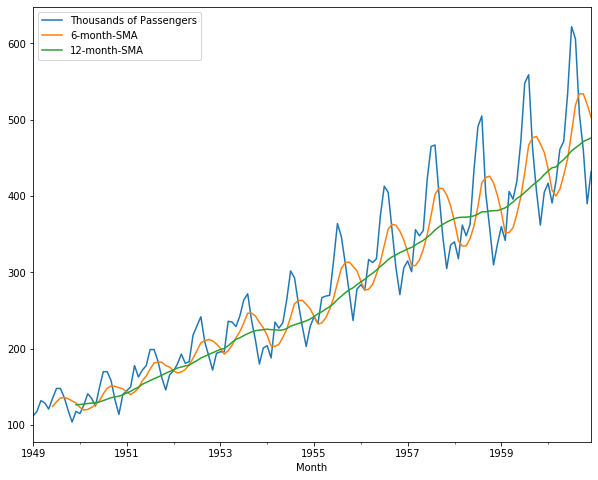

In [74]:
airline.plot(figsize=(10,8))

In [75]:
airline['EWM-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

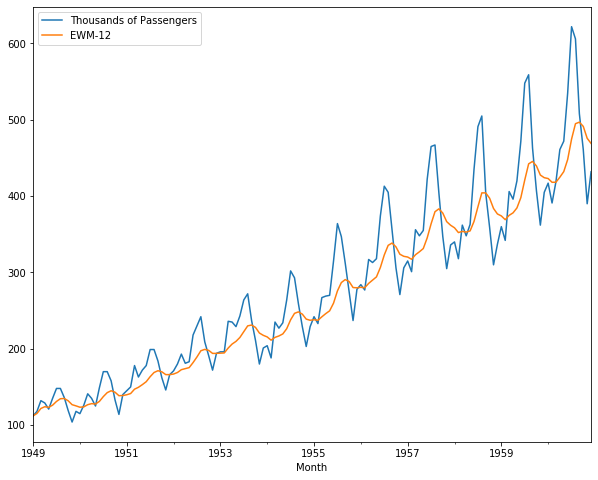

In [76]:
airline[['Thousands of Passengers','EWM-12']].plot(figsize=(10,8))

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month')

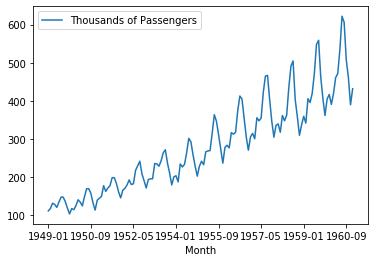

In [79]:
airline.plot()

In [80]:
airline.dropna(inplace=True)

In [81]:
airline.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [82]:
airline.index = pd.to_datetime(airline.index)

In [83]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [85]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='additive')

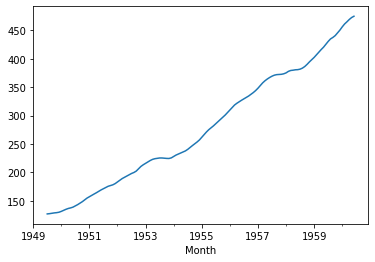

In [86]:
result.trend.plot()

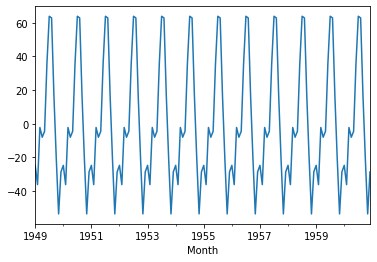

In [87]:
result.seasonal.plot()

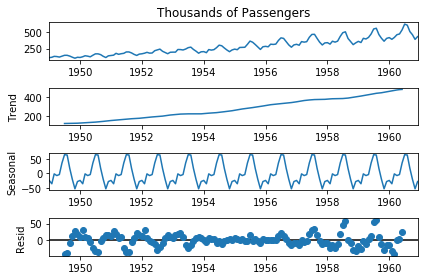

In [88]:
fig = result.plot()

In [89]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [91]:
df.columns = ['Month','Milk in pounds per cow']

In [92]:
df.tail()

,Month,Milk in pounds per cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [93]:
df.drop(168,axis=0,inplace=True)

In [94]:
df['Month'] = pd.to_datetime(df['Month'])

In [95]:
df.head()

,Month,Milk in pounds per cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [96]:
df.set_index('Month',inplace=True)

In [97]:
df

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


In [98]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [99]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


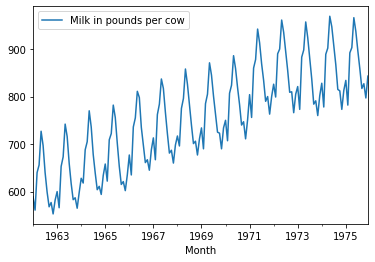

In [100]:
df.plot()

In [101]:
time_series = df['Milk in pounds per cow']

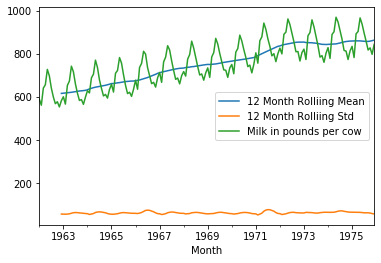

In [102]:
time_series.rolling(12).mean().plot(label = '12 Month Rolliing Mean')
time_series.rolling(12).std().plot(label = '12 Month Rolliing Std')
time_series.plot()
plt.legend()

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose

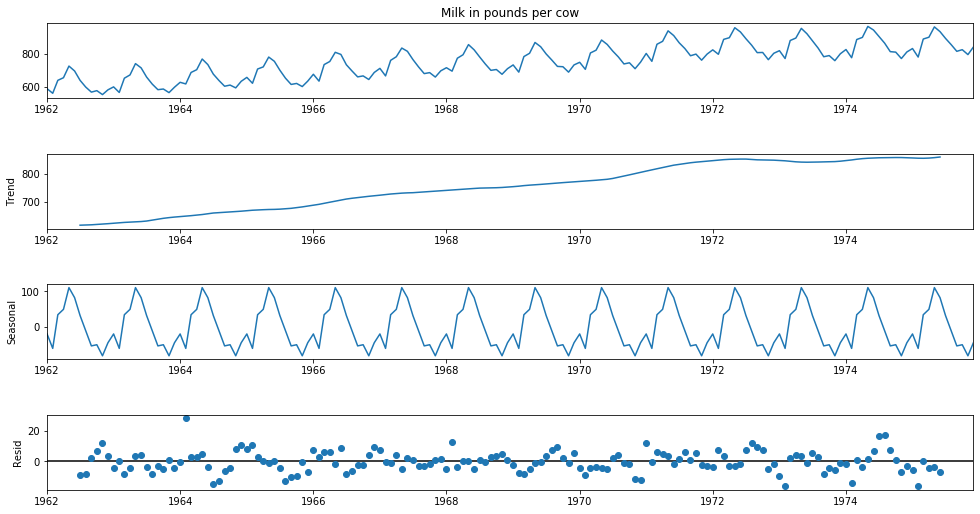

In [104]:
decomp = seasonal_decompose(time_series)
fig = decomp.plot()
fig.set_size_inches(15,8)

In [105]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [106]:
from statsmodels.tsa.stattools import adfuller

In [107]:
result = adfuller(df['Milk in pounds per cow'])

In [108]:
result

(-1.3038115874221294,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [109]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dicky-Fuller Test')
    labels = ['ADF Test Statistic', 'p-value','# of lags','Num of Observations used']
    
    for value,label in zip(result,labels):
        print(label+ " : "+str(value))
        
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unique root and is stationary")
        
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unique root and it is non-stationary")

In [110]:
adf_check(df['Milk in pounds per cow'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -1.3038115874221294
p-value : 0.6274267086030316
# of lags : 13
Num of Observations used : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unique root and it is non-stationary


In [111]:
df['First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

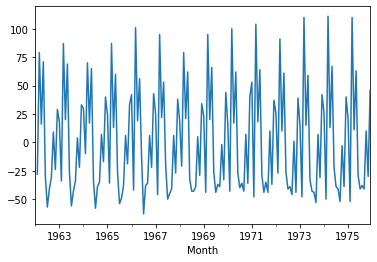

In [112]:
df['First Difference'].plot()

In [113]:
adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -3.0549955586530704
p-value : 0.030068004001785647
# of lags : 14
Num of Observations used : 152
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unique root and is stationary


In [114]:
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)

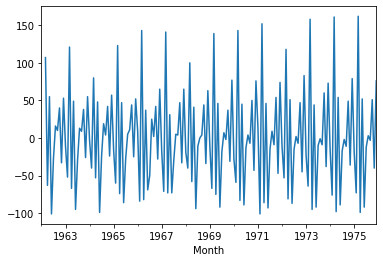

In [115]:
df['Second Difference'].plot()

In [116]:
adf_check(df['Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -14.327873645603301
p-value : 1.1126989332084581e-26
# of lags : 11
Num of Observations used : 154
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unique root and is stationary


In [117]:
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)

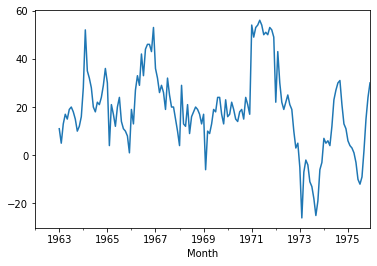

In [118]:
df['Seasonal Difference'].plot()

In [119]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -2.335419314359398
p-value : 0.1607988052771135
# of lags : 12
Num of Observations used : 143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unique root and it is non-stationary


In [120]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)

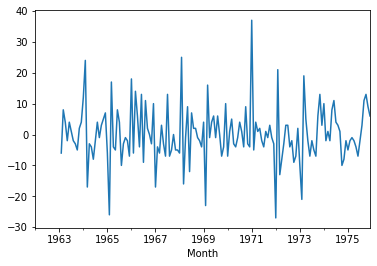

In [121]:

df['Seasonal First Difference'].plot()

In [122]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -5.038002274921984
p-value : 1.8654234318788342e-05
# of lags : 11
Num of Observations used : 143
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unique root and is stationary


In [123]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

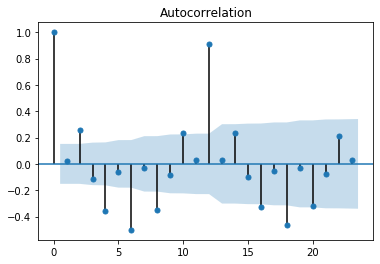

In [124]:
fig_first = plot_acf(df['First Difference'].dropna())

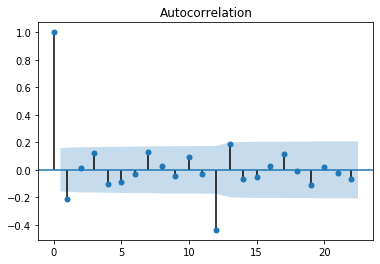

In [125]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

In [126]:
from pandas.plotting import autocorrelation_plot

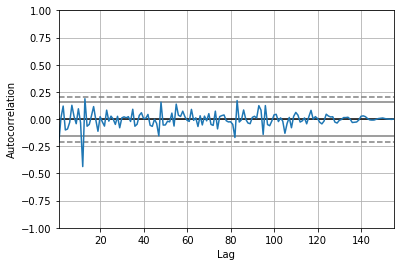

In [127]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())

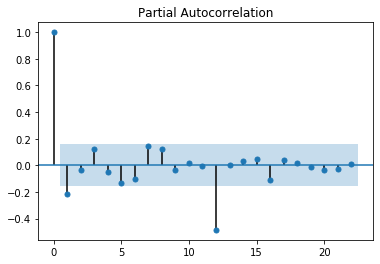

In [128]:
result = plot_pacf(df['Seasonal First Difference'].dropna())

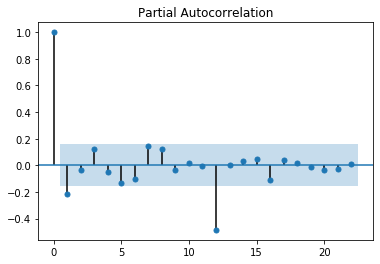

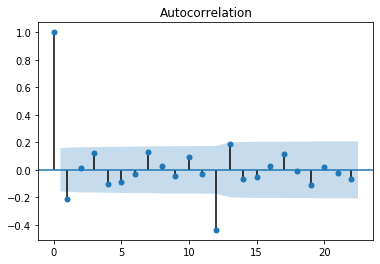

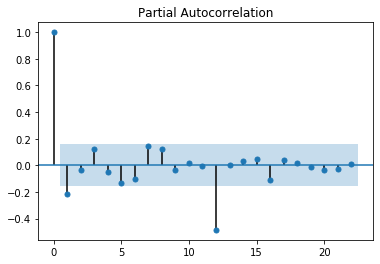

In [129]:
plot_acf(df['Seasonal First Difference'].dropna())
plot_pacf(df['Seasonal First Difference'].dropna())

In [130]:
from statsmodels.tsa.arima_model import ARIMA

In [131]:
help(ARIMA) 

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |

In [132]:
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order=(0,1,0),seasonal_order=(1,1,1,12))

C:\Users\ANKIT\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ANKIT\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [133]:
results = model.fit()

In [134]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Fri, 03 Apr 2020   AIC                           1074.131
Time:                                      15:10:28   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

In [135]:
results.resid

Month
1962-01-01    589.000000
1962-02-01    -28.000000
1962-03-01     79.000000
1962-04-01     16.000000
1962-05-01     71.000000
                 ...    
1975-08-01      2.641352
1975-09-01      8.158628
1975-10-01      7.676815
1975-11-01      6.572470
1975-12-01      5.936378
Length: 168, dtype: float64

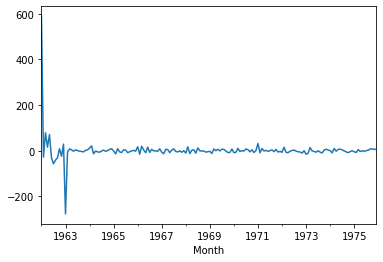

In [136]:
results.resid.plot()

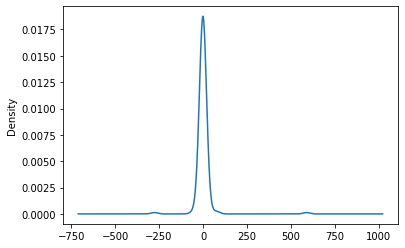

In [137]:
results.resid.plot(kind='kde')

In [138]:
df['Forecast'] = results.predict(start=150,end=168)

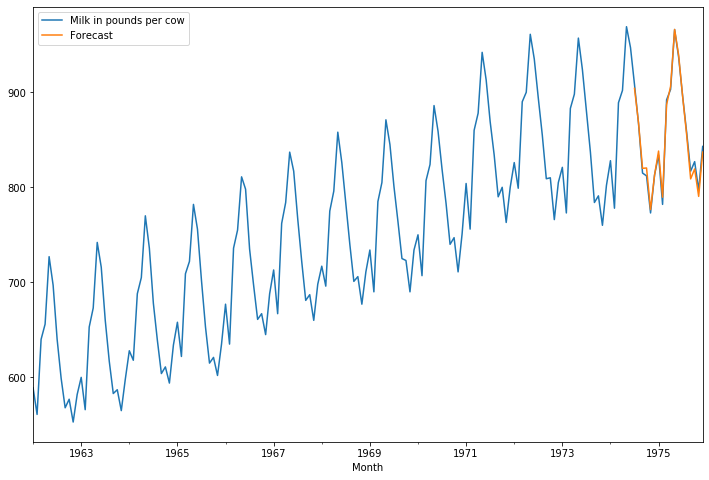

In [139]:
df[['Milk in pounds per cow','Forecast']].plot(figsize=(12,8))

In [140]:
from pandas.tseries.offsets import DateOffset

In [141]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,24)] 

In [142]:
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [143]:
future_df = pd.DataFrame(index=future_dates,columns=df.columns)

In [144]:
final_df = pd.concat([df,future_df])

In [145]:
final_df

,Milk in pounds per cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,Forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
final_df['Forecast'] = results.predict(start=168,end=192)

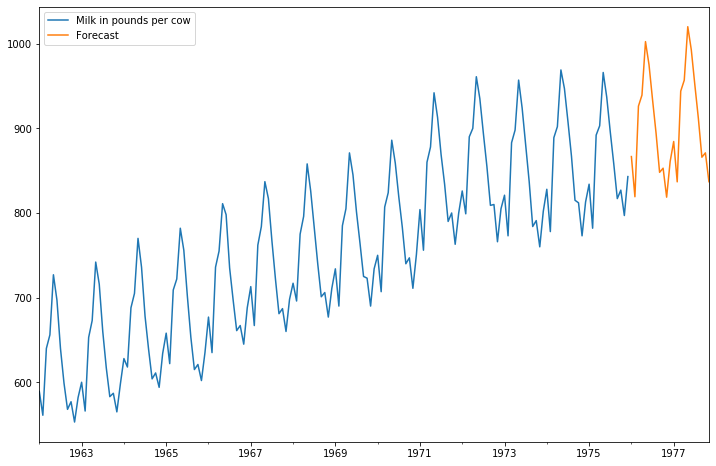

In [147]:
final_df[['Milk in pounds per cow','Forecast']].plot(figsize=(12,8))

In [148]:
import quandl
import pandas as pd

In [149]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [150]:
apple = quandl.get('WIKI/AAPL.11',api_key='WYYsRQQ3cX3GFViCs7vP',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',api_key='WYYsRQQ3cX3GFViCs7vP',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',api_key='WYYsRQQ3cX3GFViCs7vP',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',api_key='WYYsRQQ3cX3GFViCs7vP',start_date=start,end_date=end)

In [151]:
for stock_df in (apple,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [152]:
apple

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533
...,...,...
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034


In [153]:
list(zip((apple,cisco,ibm,amzn),[0.3,0.2,0.4,0.1]))

[(            Adj. Close  Normed Return
  Date                                 
  2012-01-03   52.848787       1.000000
  2012-01-04   53.132802       1.005374
  2012-01-05   53.722681       1.016536
  2012-01-06   54.284287       1.027162
  2012-01-09   54.198183       1.025533
  ...                ...            ...
  2016-12-23  115.080808       2.177549
  2016-12-27  115.811668       2.191378
  2016-12-28  115.317843       2.182034
  2016-12-29  115.288214       2.181473
  2016-12-30  114.389454       2.164467
  
  [1258 rows x 2 columns],
  0.3),
 (            Adj. Close  Normed Return
  Date                                 
  2012-01-03   15.617341       1.000000
  2012-01-04   15.919125       1.019324
  2012-01-05   15.860445       1.015566
  2012-01-06   15.801764       1.011809
  2012-01-09   15.902359       1.018250
  ...                ...            ...
  2016-12-23   29.475311       1.887345
  2016-12-27   29.620129       1.896618
  2016-12-28   29.369111       1.880545
  

In [154]:
for stock_df, allo in zip((apple,cisco,ibm,amzn),[0.3,0.2,0.4,0.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [155]:
apple

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660
...,...,...,...
2016-12-23,115.080808,2.177549,0.653265
2016-12-27,115.811668,2.191378,0.657413
2016-12-28,115.317843,2.182034,0.654610


In [156]:
for stock_df in (apple,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [157]:
apple

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988
...,...,...,...,...
2016-12-23,115.080808,2.177549,0.653265,653264.617079
2016-12-27,115.811668,2.191378,0.657413,657413.396830
2016-12-28,115.317843,2.182034,0.654610,654610.167268


In [158]:
all_pos_values = [apple['Position Values'],cisco['Position Values'],
                   ibm['Position Values'],amzn['Position Values']]
portfolio_val = pd.concat(all_pos_values,axis=1)

In [159]:
portfolio_val

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166
...,...,...,...,...
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454


In [160]:
portfolio_val.columns = ['Apple Position','CISCO Position','IBM Position','Amazon Positon']

In [161]:
portfolio_val

,Apple Position,CISCO Position,IBM Position,Amazon Positon
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166
...,...,...,...,...
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454


In [162]:
portfolio_val['Total Position'] = portfolio_val.sum(axis=1)

In [163]:
portfolio_val

,Apple Position,CISCO Position,IBM Position,Amazon Positon,Total Position
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06
...,...,...,...,...,...
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389,1.862933e+06
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563,1.876025e+06
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454,1.868094e+06


In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

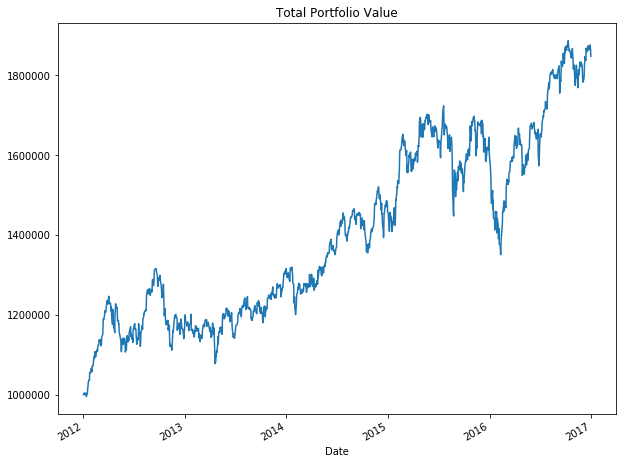

In [37]:
portfolio_val['Total Position'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

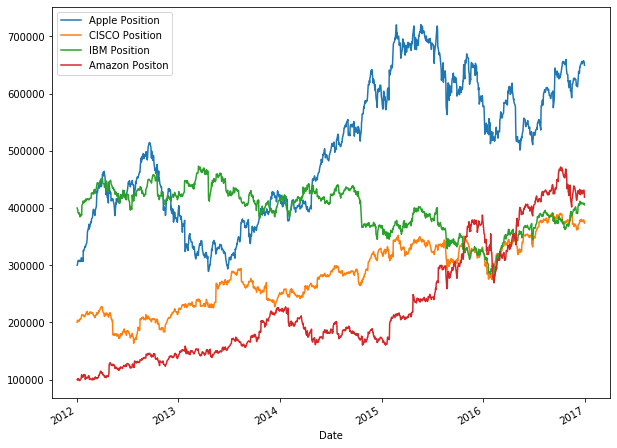

In [40]:
portfolio_val.drop('Total Position',axis=1).plot(figsize=(10,8))

In [41]:
portfolio_val['Daily Return'] = portfolio_val['Total Position'].pct_change(1)

In [42]:
portfolio_val

,Apple Position,CISCO Position,IBM Position,Amazon Positon,Total Position,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487
...,...,...,...,...,...,...
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389,1.862933e+06,-0.001025
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563,1.876025e+06,0.007028
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454,1.868094e+06,-0.004228


In [44]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

In [45]:
portfolio_val['Daily Return'].std()

0.010568287769161718

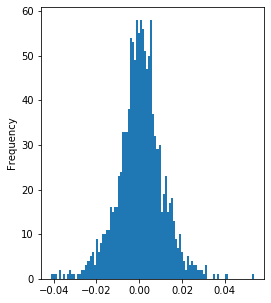

In [47]:
portfolio_val['Daily Return'].plot(kind='hist',bins=100,figsize=(4,5))

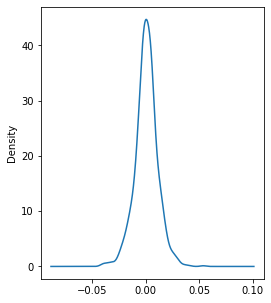

In [48]:
portfolio_val['Daily Return'].plot(kind='kde',figsize=(4,5))

In [49]:
cumulative_return = 100 * (portfolio_val['Total Position'][-1]/portfolio_val['Total Position'][0]-1)

In [50]:
cumulative_return

84.74285181665545

In [51]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [52]:
SR

0.05149680662648092

In [53]:
ASR = (252**0.5)*SR

In [54]:
ASR

0.8174864618859096

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
apple = pd.read_csv('D:/Python-for-Finance-Repo-master/09-Python-Finance-Fundamentals/AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('D:/Python-for-Finance-Repo-master/09-Python-Finance-Fundamentals/CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('D:/Python-for-Finance-Repo-master/09-Python-Finance-Fundamentals/IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('D:/Python-for-Finance-Repo-master/09-Python-Finance-Fundamentals/AMZN_CLOSE',index_col='Date',parse_dates=True)

In [60]:
stocks = pd.concat([apple,cisco,ibm,amzn],axis=1)

In [61]:
stocks.columns = ['Apple','CISCO','IBM','Amazon']

In [62]:
stocks

,Apple,CISCO,IBM,Amazon
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56
...,...,...,...,...
2016-12-23,115.547742,29.730928,163.790152,760.59
2016-12-27,116.281568,29.877002,164.212620,771.40
2016-12-28,115.785740,29.623807,163.279259,772.13


In [63]:
stocks.pct_change(1).mean()

Apple     0.000750
CISCO     0.000599
IBM       0.000081
Amazon    0.001328
dtype: float64

In [64]:
stocks.pct_change(1).corr()

,Apple,CISCO,IBM,Amazon
Apple,1.000000,0.301990,0.297498,0.235487
CISCO,0.301990,1.000000,0.424672,0.284470
IBM,0.297498,0.424672,1.000000,0.258492
Amazon,0.235487,0.284470,0.258492,1.000000


In [66]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,Apple,CISCO,IBM,Amazon
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


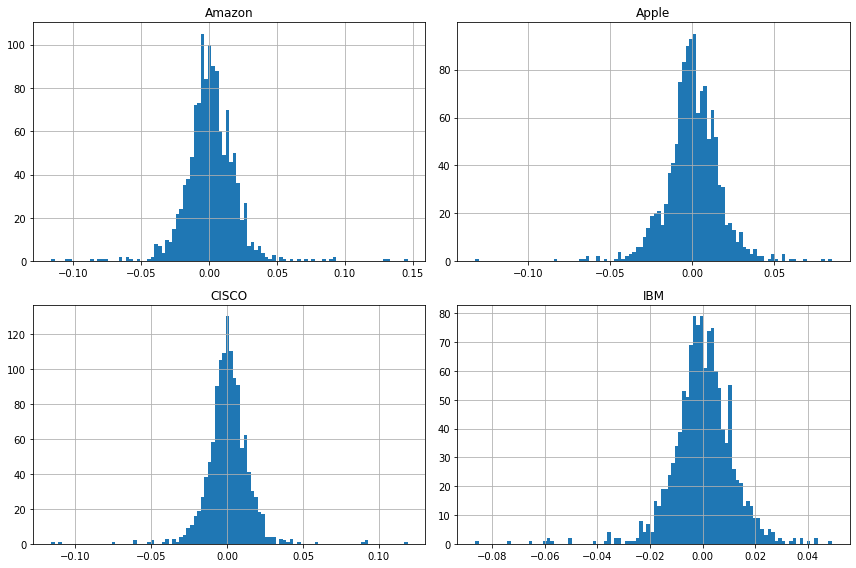

In [67]:
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [68]:
log_ret.mean()

Apple     0.000614
CISCO     0.000497
IBM       0.000011
Amazon    0.001139
dtype: float64

In [70]:
log_ret.corr()

,Apple,CISCO,IBM,Amazon
Apple,1.000000,0.301328,0.294922,0.236312
CISCO,0.301328,1.000000,0.423915,0.286434
IBM,0.294922,0.423915,1.000000,0.259051
Amazon,0.236312,0.286434,0.259051,1.000000


In [72]:
log_ret.cov() * 252

,Apple,CISCO,IBM,Amazon
Apple,0.068326,0.017854,0.014464,0.018986
CISCO,0.017854,0.051381,0.018029,0.019956
IBM,0.014464,0.018029,0.035203,0.014939
Amazon,0.018986,0.019956,0.014939,0.094470


In [82]:
np.random.seed(101)
print(stocks.columns)
weights = np.array(np.random.random(4))
print('Random Weights')
print(weights)
print('Rebalance')
weights = weights/np.sum(weights)
print(weights)
print('Expected Portfolio Return')
exp_ret = np.sum((log_ret.mean() * weights) * 252)
print(exp_ret)
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
print(exp_vol)
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['Apple', 'CISCO', 'IBM', 'Amazon'], dtype='object')
Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected Portfolio Return
0.15599272049632004
Expected Volatility
0.18502649565909488
Sharpe Ratio
0.8430831483926032


In [86]:
np.random.seed(101)
num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
for ind in range(num_ports):
    
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    all_weights[ind,:] = weights
    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]


In [88]:
sharpe_arr.argmax()

1420

In [90]:
all_weights[1420,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [92]:
max_sr_ret = ret_arr[1420]
max_sr_vol = vol_arr[1420]

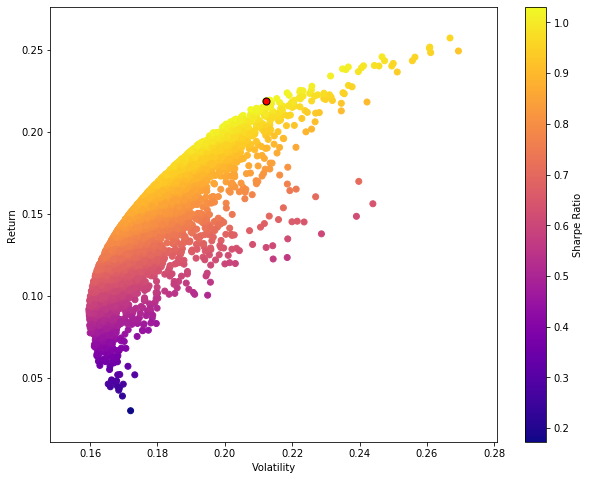

In [93]:
plt.figure(figsize=(10,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol,max_sr_ret,c='r',s=50,edgecolors='black')

In [134]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum((log_ret.mean() * weights) * 252)
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])
    

In [135]:
from scipy.optimize import minimize

In [136]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [141]:
def check_sum(weights):
    return np.sum(weights) - 1 

In [153]:
cons = ({'type':'eq','fun':check_sum})

In [154]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [155]:
init_guess = [0.25,0.25,0.25,0.25]

In [156]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [157]:
opt_results

     fun: -1.030716870336087
     jac: array([ 5.64157963e-05,  4.18275595e-05,  3.39921713e-01, -4.44799662e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289762e-01, 2.04189824e-01, 3.43149988e-17, 5.29520414e-01])

In [158]:
opt_results.x

array([2.66289762e-01, 2.04189824e-01, 3.43149988e-17, 5.29520414e-01])

In [159]:
get_ret_vol_sr(opt_results.x)

array([0.21885916, 0.21233683, 1.03071687])

In [160]:
frontier_y = np.linspace(0,0.3,100)

In [161]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [163]:
frontier_volatility = []
for possible_return in frontier_y:
    cons = ({'type':'eq','fun':check_sum},
           {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    frontier_volatility.append(result['fun'])

<Figure size 864x576 with 0 Axes>

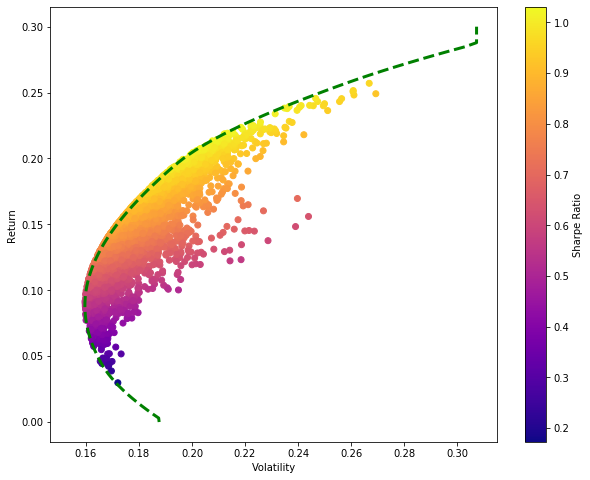

In [166]:
plt.figure(figsize=(12,8))
plt.figure(figsize=(10,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

In [133]:
from scipy import stats

In [96]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [97]:
import pandas as pd

In [99]:
import pandas_datareader as web

In [101]:
spy_etf = web.DataReader('SPY','yahoo')

In [102]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-03-31 to 2020-03-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1258 non-null   float64
 1   Low        1258 non-null   float64
 2   Open       1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   float64
 5   Adj Close  1258 non-null   float64
dtypes: float64(6)
memory usage: 68.8 KB


In [112]:
spy_etf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-23,229.679993,218.259995,228.190002,222.949997,326025200.0,222.949997
2020-03-24,244.100006,233.800003,234.419998,243.149994,235494500.0,243.149994
2020-03-25,256.350006,239.750000,244.869995,246.789993,299430300.0,246.789993
2020-03-26,262.799988,249.050003,249.520004,261.200012,257632800.0,261.200012
2020-03-27,260.809998,251.050003,253.270004,253.419998,223949300.0,253.419998


In [113]:
start = pd.to_datetime('2015-03-31')
end = pd.to_datetime('2020-03-27')

In [114]:
apple = web.DataReader('AAPL','yahoo',start,end)

In [115]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-03-31,126.489998,124.360001,126.089996,124.430000,42090600.0,114.507881
2015-04-01,125.120003,123.099998,124.820000,124.250000,40621400.0,114.342239
2015-04-02,125.559998,124.190002,125.029999,125.320000,32220100.0,115.326912
2015-04-06,127.510002,124.330002,124.470001,127.349998,37194000.0,117.195030
2015-04-07,128.119995,125.980003,127.639999,126.010002,35012300.0,115.961906


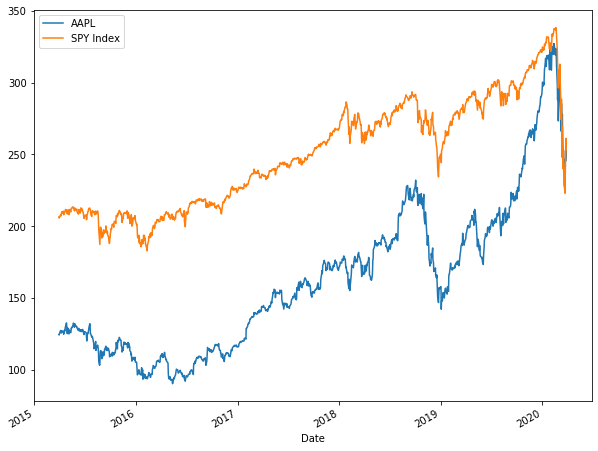

In [116]:
apple['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

In [120]:
apple['Cumulative'] = apple['Close']/apple['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

In [121]:
spy_etf

,High,Low,Open,Close,Volume,Adj Close,Cumulative
Date,,,,,,,
2015-03-31,208.100006,206.360001,207.259995,206.429993,126768700.0,186.802124,1.000000
2015-04-01,206.419998,204.509995,206.389999,205.699997,137303600.0,186.141541,0.996464
2015-04-02,206.979996,205.399994,205.619995,206.440002,86900900.0,186.811188,1.000048
2015-04-06,208.449997,205.210007,205.369995,207.830002,114368200.0,188.069000,1.006782
2015-04-07,208.759995,207.240005,207.860001,207.279999,81236300.0,187.571274,1.004118
...,...,...,...,...,...,...,...
2020-03-23,229.679993,218.259995,228.190002,222.949997,326025200.0,222.949997,1.080027
2020-03-24,244.100006,233.800003,234.419998,243.149994,235494500.0,243.149994,1.177881
2020-03-25,256.350006,239.750000,244.869995,246.789993,299430300.0,246.789993,1.195514


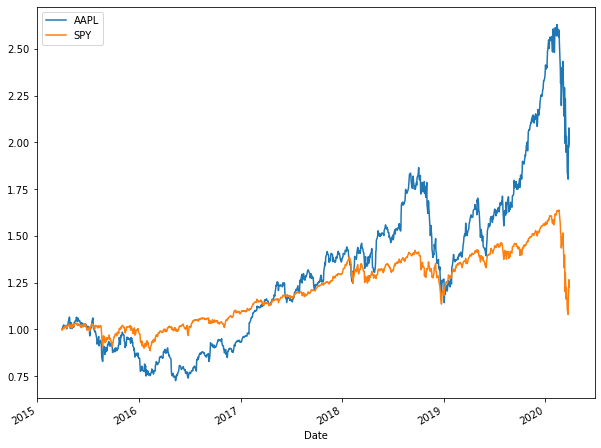

In [122]:
apple['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend()

In [123]:
apple['Daily Return'] = apple['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

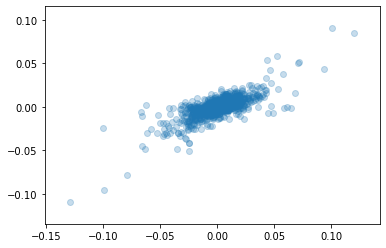

In [124]:
plt.scatter(apple['Daily Return'],spy_etf['Daily Return'],alpha=0.25)

In [126]:
beta,alpha,r_value,p_value,std_err = stats.linregress(apple['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [127]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [128]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

In [129]:
fake_stock

Date
2015-04-01   -0.002614
2015-04-02    0.004588
2015-04-06    0.005329
2015-04-07   -0.003064
2015-04-08    0.002887
                ...   
2020-03-23   -0.025459
2020-03-24    0.090417
2020-03-25    0.015081
2020-03-26    0.057392
2020-03-27   -0.028583
Name: Daily Return, Length: 1257, dtype: float64

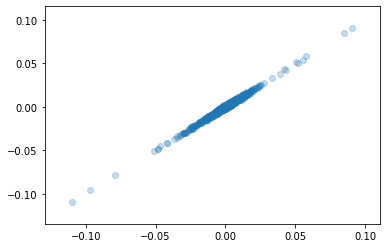

In [130]:
plt.scatter(fake_stock,spy_etf['Daily Return'].iloc[1:],alpha=0.25)

In [131]:
beta,alpha,r_value,p_value,std_err = stats.linregress(fake_stock,spy_etf['Daily Return'].iloc[1:])

In [132]:
beta

0.9947481026350763